<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Romanowski/klasyfikacjaBinarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Dane dotyczące raka piersi
data = load_breast_cancer()
y = data.target
X = data.data

In [19]:
# Liczba wszystkich przypadków
liczba_przypadkow = len(y)
print("Liczba wszystkich przypadków:", liczba_przypadkow)

# Liczba przypadków raka złośliwego
liczba_zlosliwych = sum(y)
print("Liczba przypadków raka złośliwego:", liczba_zlosliwych)

Liczba wszystkich przypadków: 569
Liczba przypadków raka złośliwego: 357


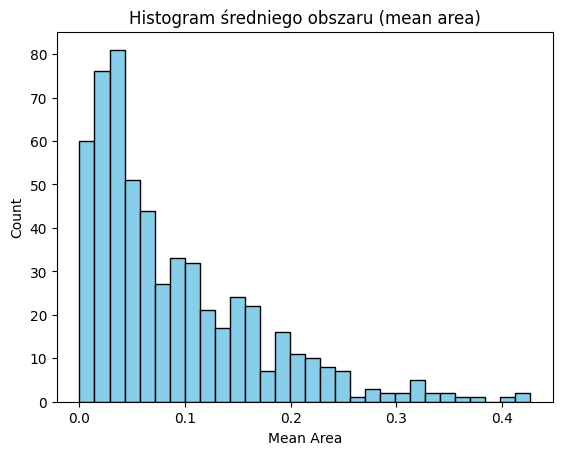

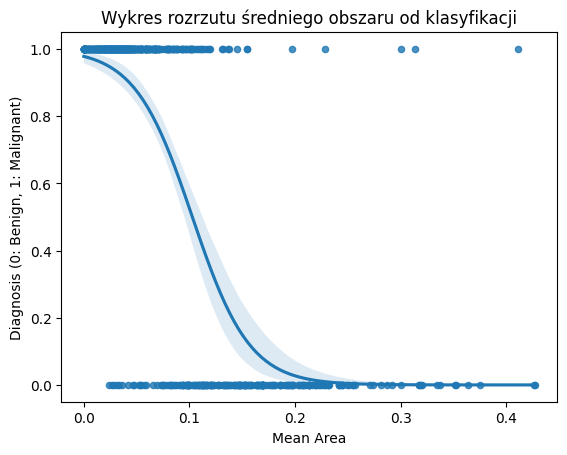

In [20]:
# Histogram średniego obszaru (mean area)
mean_area = X[:, 6]  # Indeks 6 odpowiada za mean area w danych
plt.hist(mean_area, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram średniego obszaru (mean area)')
plt.xlabel('Mean Area')
plt.ylabel('Count')
plt.show()

# 4. Wykres rozrzutu (scatterplot) średniego obszaru od klasyfikacji
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'s': 20})
plt.title('Wykres rozrzutu średniego obszaru od klasyfikacji')
plt.xlabel('Mean Area')
plt.ylabel('Diagnosis (0: Benign, 1: Malignant)')
plt.show()

Dokładność (Accuracy): 0.9766081871345029
Precyzja (Precision): 0.9642857142857143
Czułość (Recall): 1.0


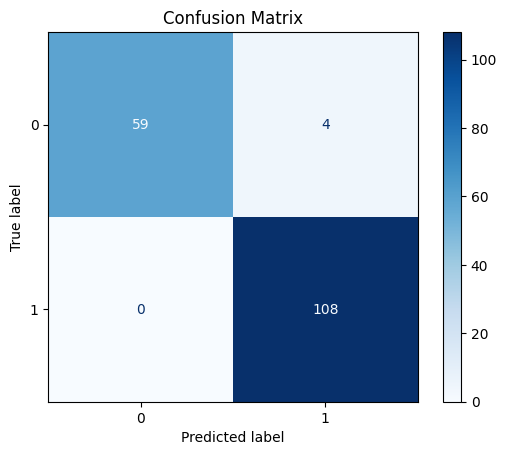

In [21]:
# Standaryzacja danych za pomocą MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Podział zbioru danych na testowy (30%) i uczący (70%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Budowa modelu regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie dokładności
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność (Accuracy):", accuracy)

# Obliczenie precyzji
precision = precision_score(y_test, y_pred)
print("Precyzja (Precision):", precision)

# Obliczenie czułości
recall = recall_score(y_test, y_pred)
print("Czułość (Recall):", recall)

# Wizualizacja wyników za pomocą macierzy pomyłek (confusion matrix)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

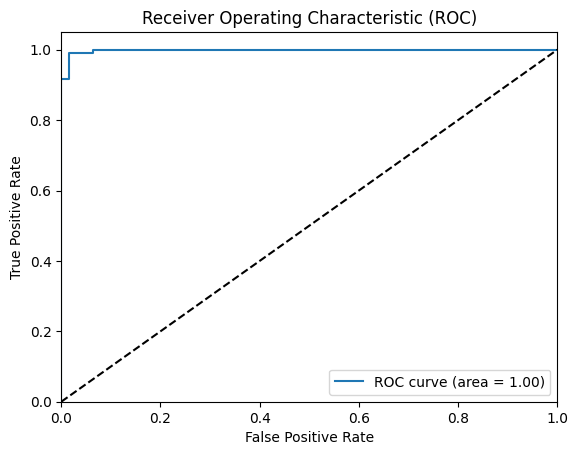

In [22]:
# Wizualizacja wyników za pomocą krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [25]:
print("Rozmiar y_test:", len(y_test))
print("Rozmiar y_score:", len(y_score))


Rozmiar y_test: 171
Rozmiar y_score: 569


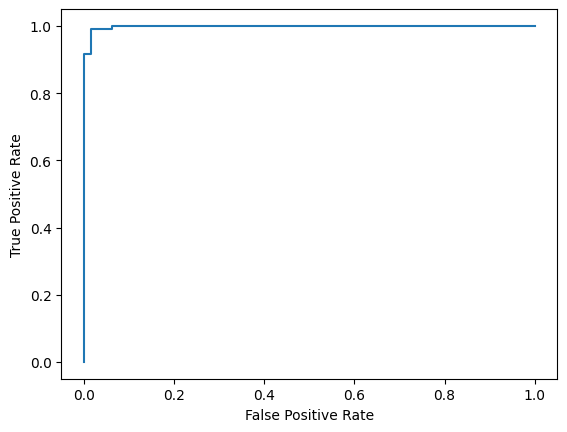

In [28]:
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.svm import SVC

clf = SVC()
clf.fit(X, y)

y_score = model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label = clf.classes_[1])

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()